**EDA on CENSUS INCOME DATASET**

---



> BY - SURAJ SINGH
  



>  WALCHAND INSTITUTE OF TECHNOLOGY, SOLAPUR

For the datset [click here](https://www.kaggle.com/code/alokevil/simple-eda-for-beginners/data)







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.shape

(48842, 15)

In [ ]:
df.size

732630

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

There are no null spaces in the dataset however there are some some spaces filled with '?' so we have to ignore these entities in order to avoid error while performing EDA.

In [ ]:
attrib, counts = np.unique(df['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['workclass'][df['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['occupation'][df['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['native-country'][df['native-country'] == '?'] = most_freq_attrib 

As we have income in two groups i.e. above 50k(>50k) and equal or below 50k(=< 50k) so we have normalised the data as :
> ( > 50k ) : 1

> ( =< 50 ) : 0.





In [ ]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [ ]:
data = df.drop(['educational-num','income'],axis = 1)
data.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


Summary of attributes explain following things:

>
**For Age :**

>The **mean value is 38** i.e. on an average the value of age attribute is 38.
Age is having the standerd deviation 13.71 which indicates the deviation of an observation from the mean.
The value of Age attribute varies from 17 to 90.
The 1st quartile is 28 i.e. 25% of the observations lies below 28.
3rd quartile is 48 which indicates that in 75% of the observations the value of age is less than 48.
The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the **data is more dispersed after the value 48**.
**The difference between mean & median is not significantly high but the difference between 3rd quartile & maximum made the distribution right skewed.**
>
**For fnlwgt :**

>This is the sampling weight corresponding to the observations.
**finalweight seems to be rightly skewed** since there is very large distance between median & maximum value as compared to minimum & median value.
>
**For capital-gain :**

>
For capital-gain the mean is 1079.06 and median is 0, which indicates that the distribution is highly right skewed.
From the qurtiles it is clearly visible that **75% observations are having capital gain zero.**
capital-gain is concentrated on the one particular value i.e. zero and other are spread after 3rd quartile which results as the large standard deviation(7452.01).
capital-gain shows that **either a person has no gain or has gain of very large amount(10k or 99k).**
>
**For capital-loss :**

This attribute is **similar to the capital-gain** i.e. most of the values are centered on 0(this can be told using the summary statistic as minimum is 0 and values lie under 75 percentile is also zero.
Mean is 87 but median is 0(i.e. mean is greater than median this tells us that it is right skewed distribution).
>
**For hours-per-week :**

This attribute means number of working hours spend by an individual in a week.
In this data the hours per week atrribute varies within the range of 1 to 99.
**75 percentage of the people spend 45 or less working hours per week.**
The IQR is very less i.e. [40-45] which indicates that 50% of the observations are concentrated between 40 & 45.
Observations are very sparse below 25th percentile and after 75th percentile.
Using quartiles we can say that data is **approximately symmetric**.

In [ ]:
data.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36705,15784,22379,8981,19716,41762,32650,44689


* Native-country has maximum number of unique categories i.e. 41 categories.

*   But the native-country is highly biased toward the US which has frequency of 44689 out of total 48842(nearly 91%).

*   Occupation has more or less uniform distribution of categories as comparerd to the other attributes.

*   Race is also biased to the white race category(41762) with 85.5%.


*   The top category in workclass is Private having frequency(36705) and percentage(75.5%).









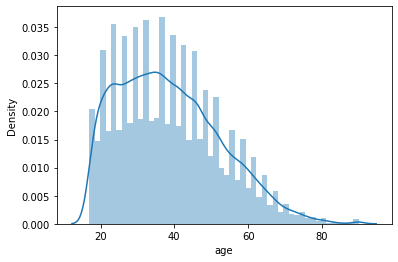

In [ ]:
sns.distplot(df['age'])

The above distribution plot shows that :
*   
"age" attribute is not symmetric.

*  
it is right-skewed (But this is totally fine as younger adult earn wages not the older ones).

*   
The density of counts decreases sharply after 60 i.e. there are very less data od senior citizens.





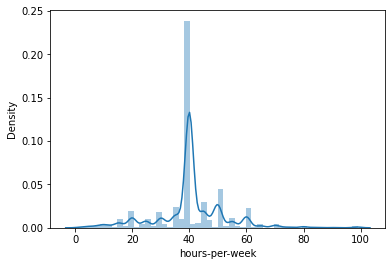

In [ ]:
sns.distplot(df['hours-per-week'])

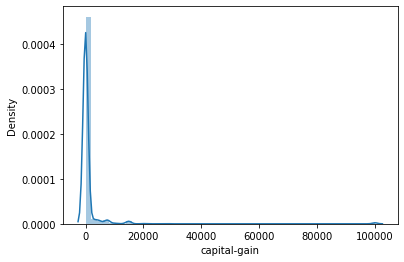

In [ ]:
sns.distplot(df['capital-gain'])

**Description about distribution**

*   
This Distribution plot shows that most of the "capital-gain"values are centered on 0 and few on 10k and 99k.
*   
Capital-gain is concentrated on the one particular value and other are spread 
with large standard deviation.

*   
Capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).








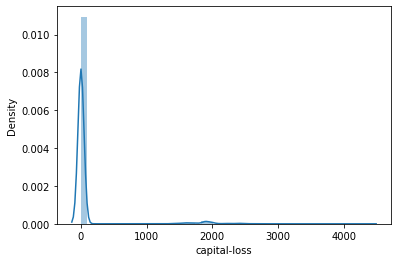

In [ ]:
sns.distplot(df['capital-loss'])

Description about distribution


*   
This distribution plot shows that most of the "capital-loss" values are centered on 0 and only few are non zero.
*   
This attribute is similar to the capital-gain i.e. most of the values are centered on 0.



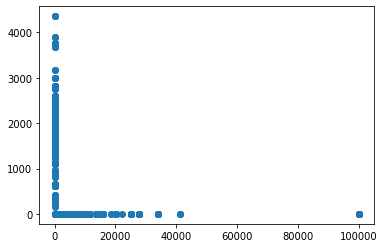

In [ ]:
plt.scatter('capital-gain','capital-loss', data= df)

Possibilities for capital gain and capital loss:


*   
Both capital gain and capital loss can be zero
*   
If capital.gain is zero there is possibility of capital loss being high or above zero.

* 
If capital loss is zero there is possibility of capital gain being high or above zero.




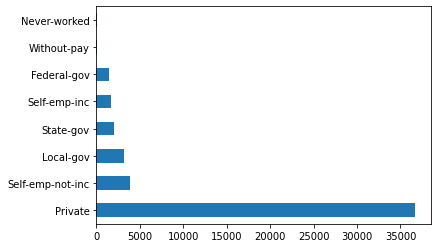

In [ ]:
df['workclass'].value_counts().plot( kind = 'barh')

Summary of the above bar graph shows that:


*   
There are 8 unique categories present in the worclass attribute.
*   
Most of them belong to the private workclass.

*   
Without-pay and never-worked has minimum count in workclass attribute(less than 1%).
*   
There is huge imbalance in the categories of workclass attribute.






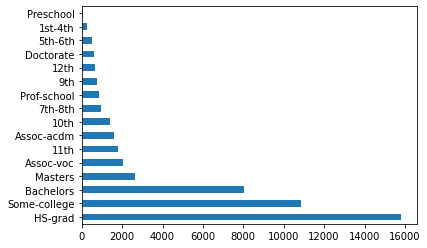

In [ ]:
df['education'].value_counts().plot( kind = 'barh')



*   
There are 16 unique categories present in the education attribute.

*   
Hs-grad has 32.32% of all the education attribute.
*   
HS-grad has the maximum number of observations followed by some-college(10878) and Bachelors.


*   
Pre-school has minimum samples




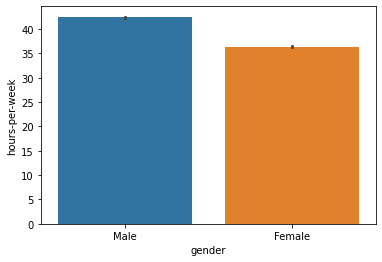

In [ ]:
sns.barplot(df['gender'],df['hours-per-week'])

The above barplot shows that:




* Working hours per week for females is around 35 hours
* Working hours per week for males is around 44 hours 
*  Males on an average tends to have longer working hours per week





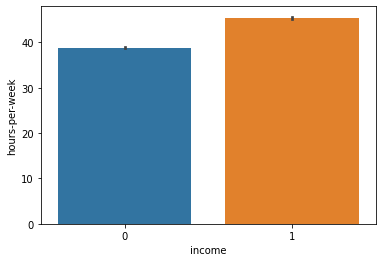

In [ ]:
sns.barplot(df['income'],df['hours-per-week'])

The above barplot shows that:


*   Group 1 (>50k) income category have higher number of working hours.
*  Meanwhile group 0 (=< 50k) income category have relatively lower working hours.



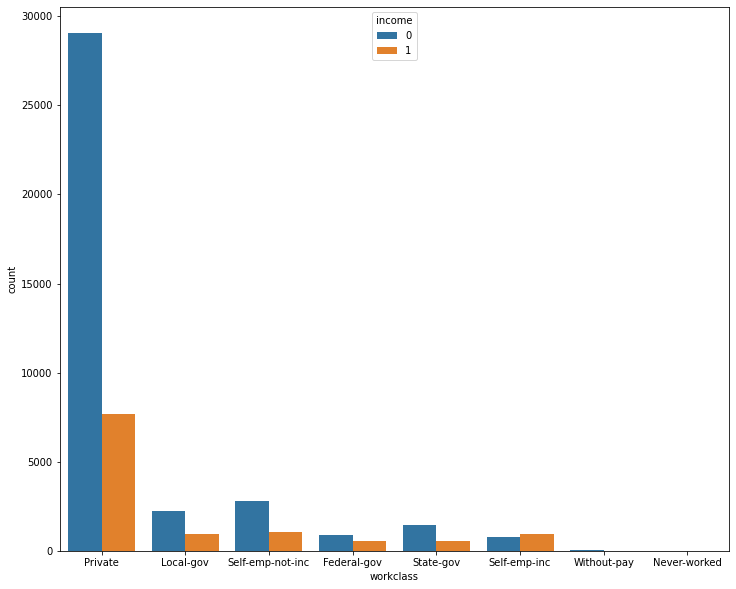

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x="workclass", hue="income", data=df)

This plot shows that:


*   
In private workclass most of the people earn <=50k (belong to income 
group 0).

*   
self-emp-inc workclass is only where more people earn >50k (belong to income group 1).
*   
In Federal-gov workclass nearly more than half of the people earn >50k.



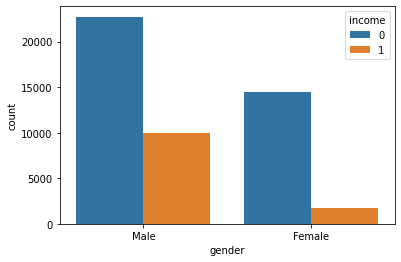

In [ ]:
sns.countplot(x="gender", hue="income", data=df)

The above barplot shows that:


*   Males dominates the group 1 (>50k) income category.
*  Meanwhile females have higher proportion in group 0 (=< 50k) income category.


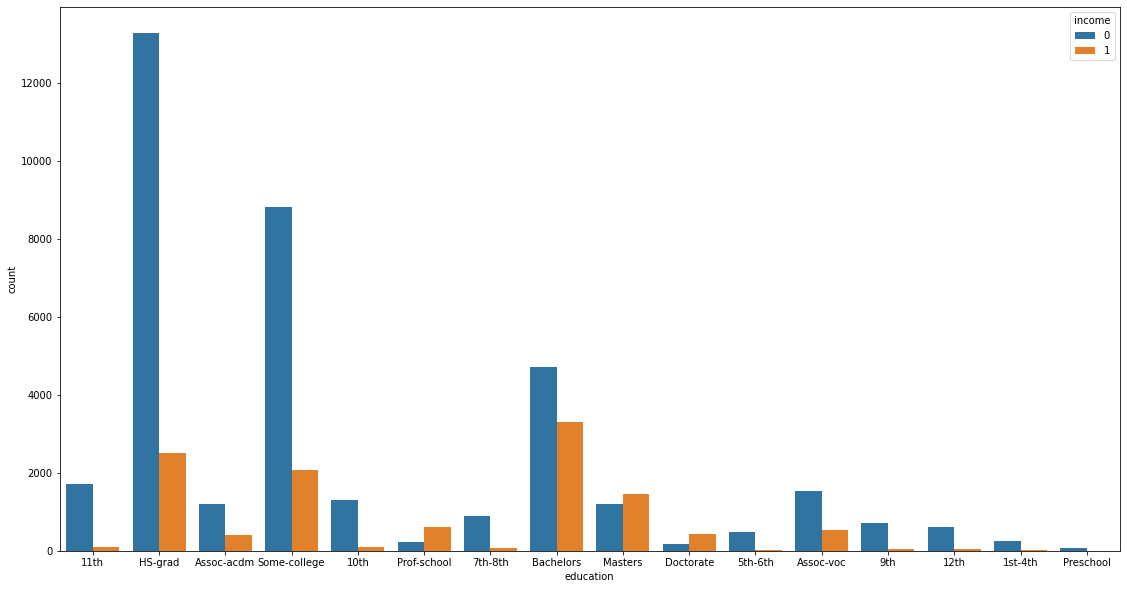

In [ ]:
plt.figure(figsize=(19,10))
sns.countplot(x="education", hue="income", data=df)

This plot shows that:

* 
Despite the fact that most of the categories fall under the HS-grad but the interesting thing is only 5.12% of all people belong to the income group 1(i.e. earns more than 50k), surprisely less than the categories fall under the Bachelors which is 6.78%.
* 
There only few categories in "education" attribute whose percentage to fall under income group 1 is greater than the falling under income group 0.

* 
These are prof-school, masters and doctorate.
* 
We can also infer that higher eduction may provide better earnings.



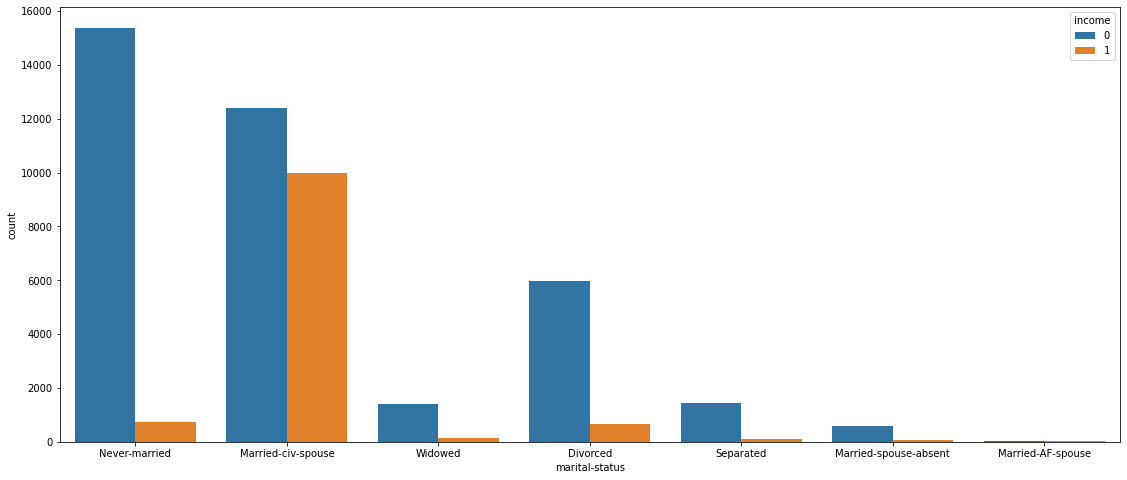

In [ ]:
plt.figure(figsize=(19,8))
sns.countplot(x="marital-status", hue="income", data=df)

This countplot explain following things:


*   
Married-civ-spouse has the highest percentage of falling under the income group 1 (>50k).

*   
Despite the fact that we have 16117 observation in the marital-status attribute(which is sec. highest) but only 1.5% of the people of "Never-married" earn more than 50k.
*   
Married-spouse-absent and Married-AF-spouse has negligible contribution to the fall under income group 1.





# **CONCLUSION**


---

1. This dataset not balance , i.e. 76% of them are belong to income group 1 (who earns more than 50k) and 23.93% fall under the income group 0 (who earns less than 50k).

2. Females have more flexible working hours per week in the income groups who earns <=50k.

3. Males have Lless flexible working hours per week in the income groups who earns >50k.

4. Generally people can be seen working for 30 hours to 40 hours per week. 

5. Income group who earns >50k have more working hours.

6. For "female" earning more than 50k is rare with only of all observations.
   But for male, quite a portion  of all people earn more than 50k .

7. self-emp-inc workclass is only where more people earn >50k(belong to income group 1).

8. People having degree doctorate , prof-school , masters are making salary more than 50K (it can be concluded that higher education means more salary).